# Artifical Neural Network Model for Predicition of Valence of a song

**Importing relevant Libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset and relevant features assessment through correlation matrix**

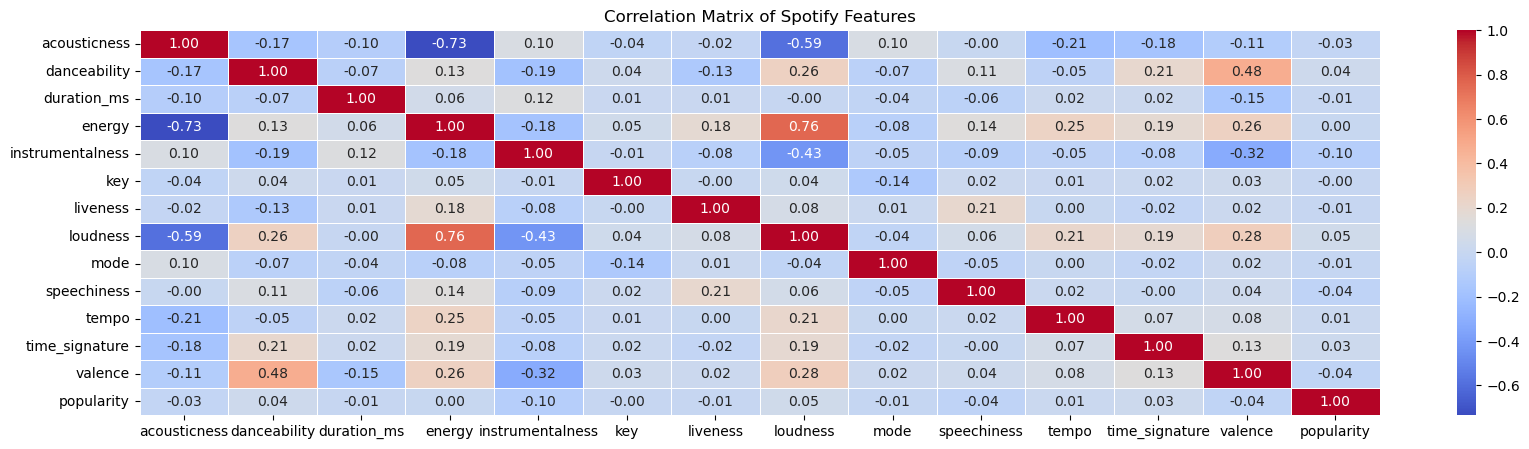

In [2]:
spotify_df = pd.read_csv("Spotify.csv")

columns_for_correlation = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
            'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence','popularity']

#Correlation matrix
correlation_matrix = spotify_df[columns_for_correlation].corr()


plt.figure(figsize=(20, 5))  
sns.heatmap(correlation_matrix,
            annot=True,  
            cmap='coolwarm', 
            fmt=".2f",  
            linewidths=0.5,  
            linecolor='white')  
plt.title('Correlation Matrix of Spotify Features') 
plt.show()


**Assesmbling Relevant Features**

In [3]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
            'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
            'valence']  

target = ['valence']


# Create X and y
X = spotify_df[features].drop(columns=['valence'])  # Features
y = spotify_df[target]  # Target

**Model Design**

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Define the Neural Network Model


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression
])


# 4. Compile the Model

optimizer = Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='mean_squared_error')

C:\Users\Study-Work\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Model Execution**

In [5]:
#5. Train the Model

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)  # Added validation split

# 6. Make Predictions

y_pred = model.predict(X_test_scaled)

# 7. Evaluate the Model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Epoch 1/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0553 - val_loss: 0.0382
Epoch 2/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0382 - val_loss: 0.0375
Epoch 3/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0368 - val_loss: 0.0372
Epoch 4/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0357 - val_loss: 0.0362
Epoch 5/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0354 - val_loss: 0.0360
Epoch 6/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0350 - val_loss: 0.0359
Epoch 7/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0347 - val_loss: 0.0354
Epoch 8/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0341 - val_loss: 0.0353
Epoch 9/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0340 - val_loss: 0.0348
Epoch 10/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0340 - val_loss: 0.0352
Epoch 11/50
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0333 - val_loss: 0.0350
Epoch 12/50
2280/2280 ━━━━━━━━

**Model Evaluation**

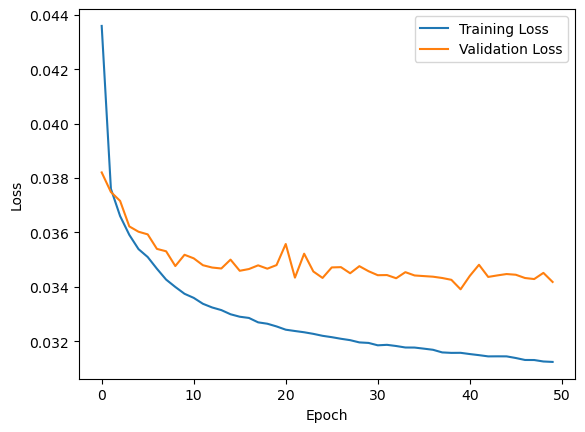

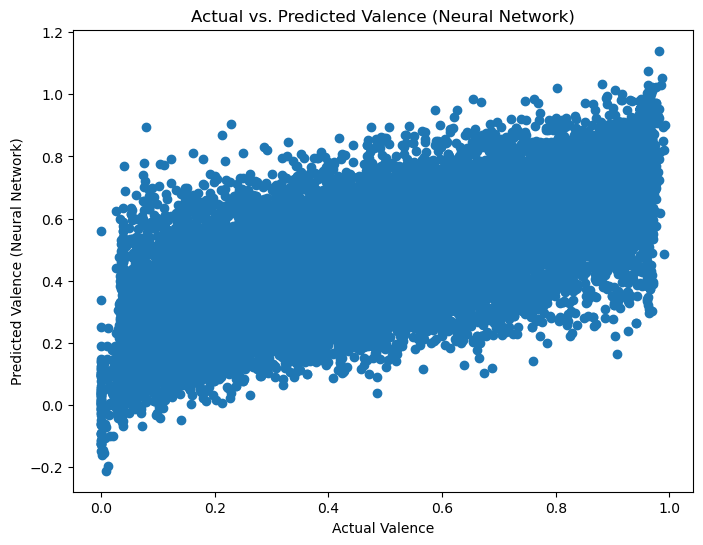

In [6]:
# 8. Plotting the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 9. Visualization (Optional)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Valence")
plt.ylabel("Predicted Valence (Neural Network)")
plt.title("Actual vs. Predicted Valence (Neural Network)")
plt.show()


# Random Forest Regressor for Prediciting Valence of a song

**Importing relevant libraries**

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

**Assembling features + targert variables**

In [8]:
# 1. Load and Prepare Data

features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
            'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature'] 
target = 'valence'

# Create X and y
X = spotify_df[features]
y = spotify_df[target]



**Designing + Executing Model**

Mean Squared Error: 0.02326971921445462
R-squared: 0.6566187354197146


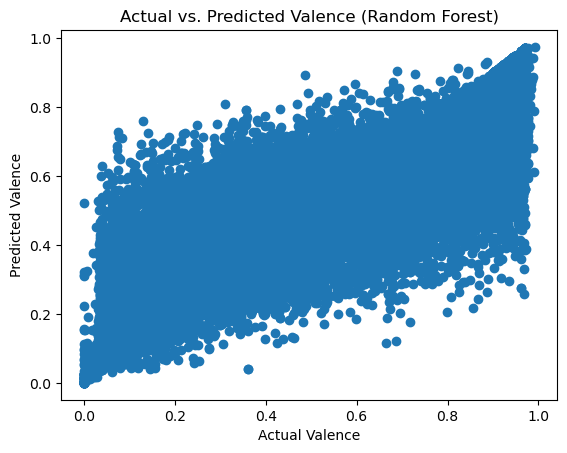

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model Selection and Training

model = RandomForestRegressor(random_state=42)  
model.fit(X_train, y_train)

# 3. Prediction

y_pred = model.predict(X_test)

# 4. Evaluation

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 5. Visualization 

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Valence")
plt.ylabel("Predicted Valence")
plt.title("Actual vs. Predicted Valence (Random Forest)")  
plt.show()


# Neural Network vs. Random Forest Performance


**Neural Network**

Features: ['loudness', 'energy', 'danceability', 'key', 'mode', 'instrumentalness', 'duration_ms', 'acousticness', 'tempo', 'time_signature']

Performance:

Mean Squared Error = 0.03398090510887758

R-squared = 0.4985584020614624

**Random Forest**

Features: ['loudness', 'energy', 'danceability', 'key', 'mode', 'instrumentalness', 'duration_ms', 'acousticness', 'tempo', 'time_signature']

Performance:

Mean Squared Error = 0.02326971921445462

R-squared = 0.6566187354197146

**Interpretation**

The Random Forest model outperforms the Neural Network model. It has a lower Mean Squared Error (MSE) and a higher R-squared, indicating better predictive accuracy and a stronger relationship between the features and the target variable (valence).

The Random Forest model explains approximately **65.66%** of the variance in valence, while the Neural Network explains **50.02%**.

Considerations:

Features: Both ['loudness', 'energy', 'danceability', 'key', 'mode', 'instrumentalness', 'duration_ms', 'acousticness', 'tempo', 'time_signature']. 

Model Complexity: Neural networks are generally more complex models than Random Forests and may require more data and careful tuning. In this case, the Random Forest model, with its simpler structure or better-suited features, achieves superior performance.

Context: The "best" model depends on the specific requirements of the application. If interpretability is important, Random Forest is generally preferred. However, based on these results, Random Forest also provides better performance.